# Projet 3 OpenFoodFacts - Notebook d'analyse des données


Lien vers les consignes du projet sur openclassrooms : https://openclassrooms.com/fr/projects/628/assignment

Lien vers la définition des variables : https://world.openfoodfacts.org/data/data-fields.txt

## Environnement & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

## Chargement

In [3]:
#data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')
data = pd.read_csv('data/en.openfoodfacts.org.products_cleaned2.csv')

C:\Users\Vincent\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,stores,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,fr:Xsf,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
3,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06
4,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,Mini coco,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg,NaN,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,2018-11-17 12:05:32,2018-11-17 12:05:33


In [5]:
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.shape

(452606, 45)

In [7]:
data.isna().sum()

code                                          0     
url                                           0     
creator                                       0     
product_name                                  14796 
quantity                                      315683
packaging                                     373326
packaging_tags                                0     
brands                                        238808
categories                                    282575
origins_tags                                  0     
manufacturing_places_tags                     0     
labels_tags                                   0     
stores                                        376478
ingredients_text                              314294
traces_tags                                   0     
additives_n                                   315187
additives_tags                                0     
ingredients_from_palm_oil_n                   314294
ingredients_from_palm_oil_tags                

## Correction des types

In [8]:
data.dtypes

code                                          object 
url                                           object 
creator                                       object 
product_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
brands                                        object 
categories                                    object 
origins_tags                                  object 
manufacturing_places_tags                     object 
labels_tags                                   object 
stores                                        object 
ingredients_text                              object 
traces_tags                                   object 
additives_n                                   float64
additives_tags                                object 
ingredients_from_palm_oil_n                   float64
ingredients_from_palm_oil_ta

In [9]:
types = pd.read_csv('dtypes.csv')
types.sample(5)

,index,dtypes
21,ingredients_that_may_be_from_palm_oil_tags,category
20,ingredients_that_may_be_from_palm_oil,float64
22,nutrition_grade_fr,category
17,ingredients_from_palm_oil_n,category
18,ingredients_from_palm_oil_tags,category


In [10]:
for column in data.columns:
    column_type = types[types['index'].str.match(column)]['dtypes'].values[0]
    data[column] = data[column].astype(column_type)

In [11]:
data.dtypes

code                                          object        
url                                           object        
creator                                       object        
product_name                                  object        
quantity                                      object        
packaging                                     object        
packaging_tags                                category      
brands                                        object        
categories                                    object        
origins_tags                                  category      
manufacturing_places_tags                     category      
labels_tags                                   category      
stores                                        object        
ingredients_text                              object        
traces_tags                                   category      
additives_n                                   float64       
additives_tags          

# QUESTION 2 


**Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.**

## Analyse Univariée

### Distribution

C:\Users\Vincent\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Vincent\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Vincent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Vincent\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


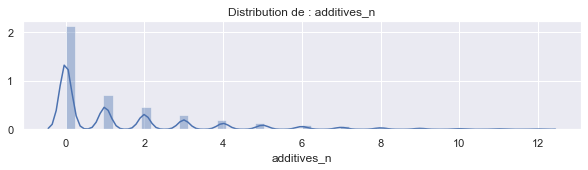

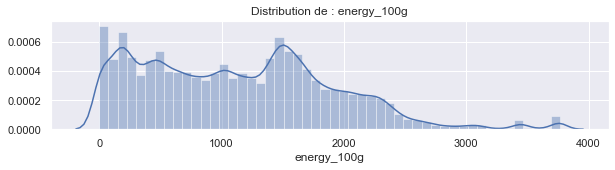

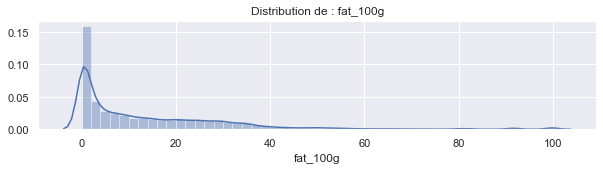

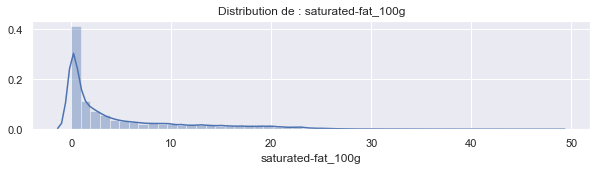

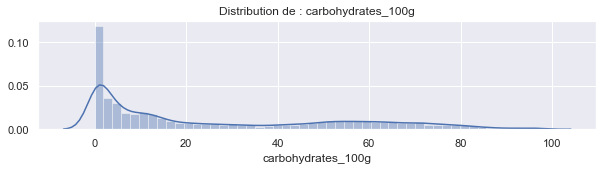

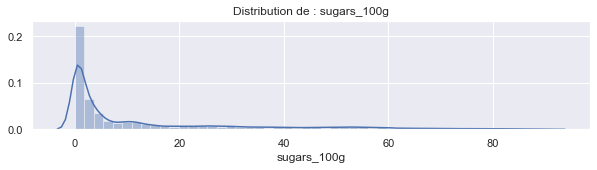

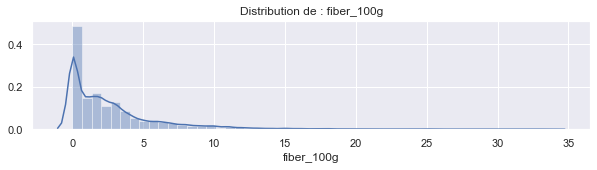

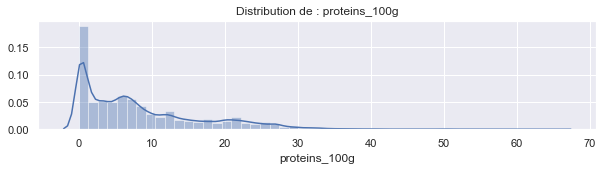

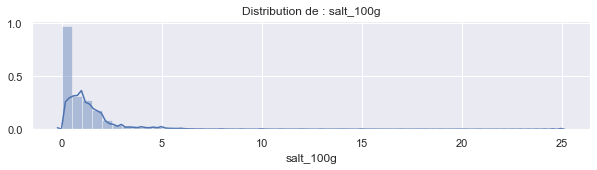

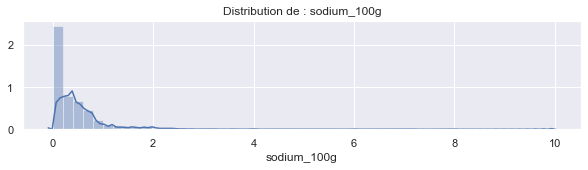

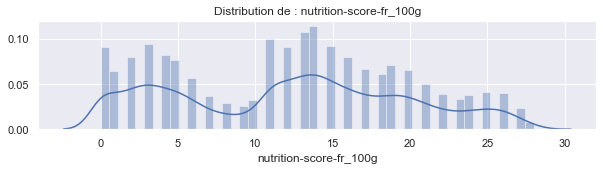

In [12]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

In [13]:
numeric_columns

Index(['additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

**Observations :**
* Certaines distributions ont une allure très semblable:
    * fat_100g
    * saturated-fat_100g
    * carbohydrates_100g (à l’exception de la partie entre 40 et 80g)
    * sugars_100g
    * fiber_100g
    * sodium_100g
    * salt_100g
    * proteins_100g
    
    
* Certaines variables sont discrètes:
    * nutrition-score-fr_100g
    * additives_n

### Boîtes à moustaches

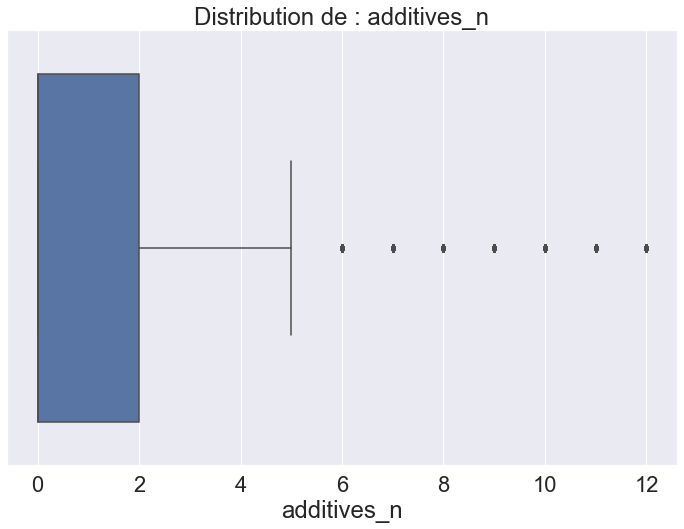

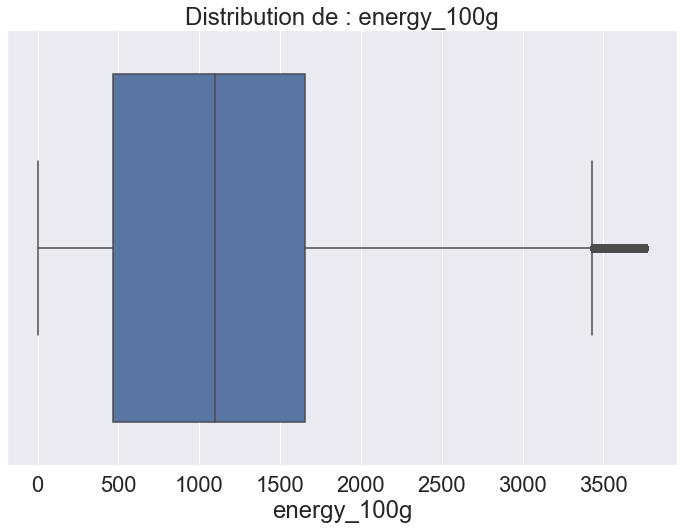

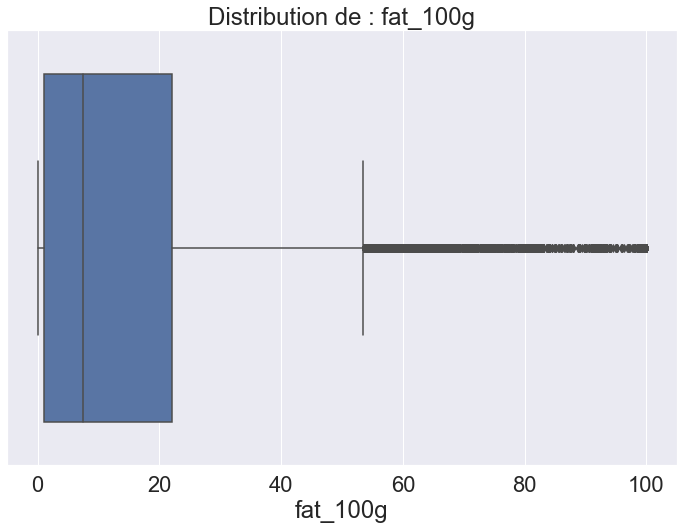

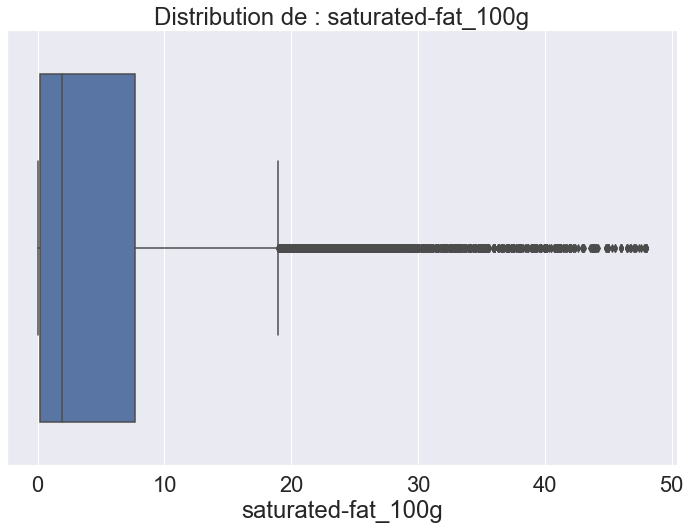

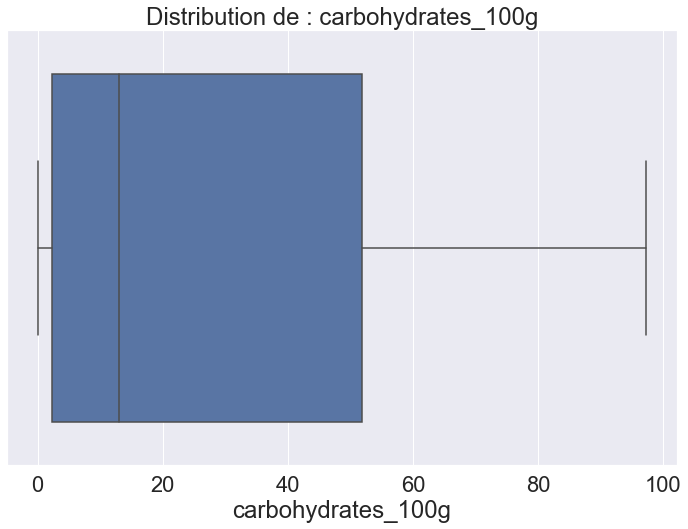

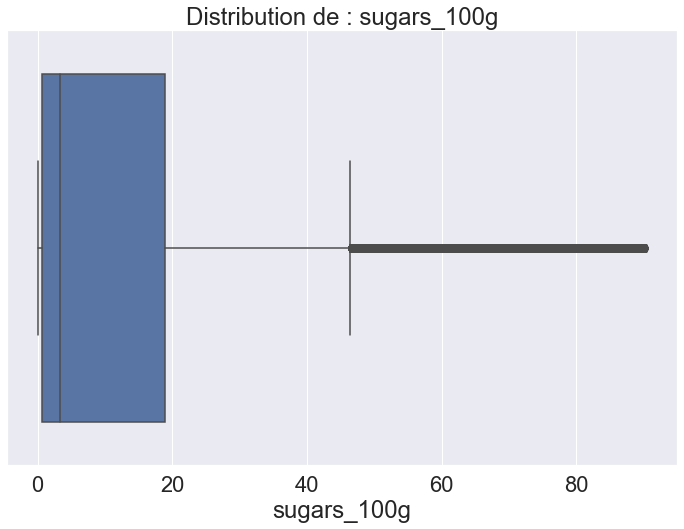

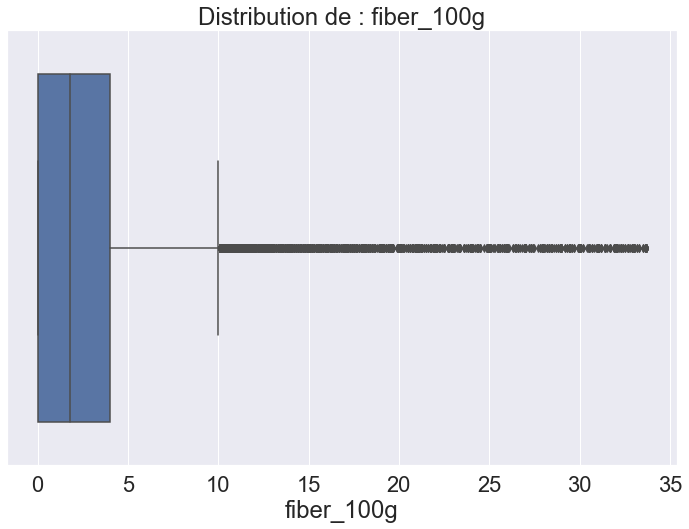

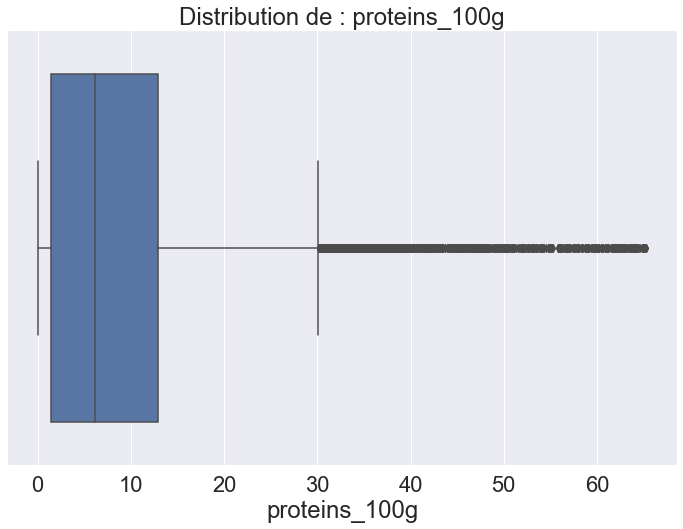

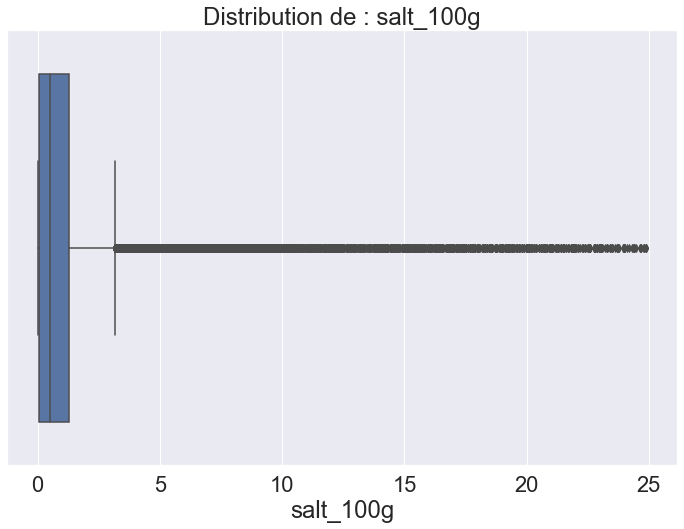

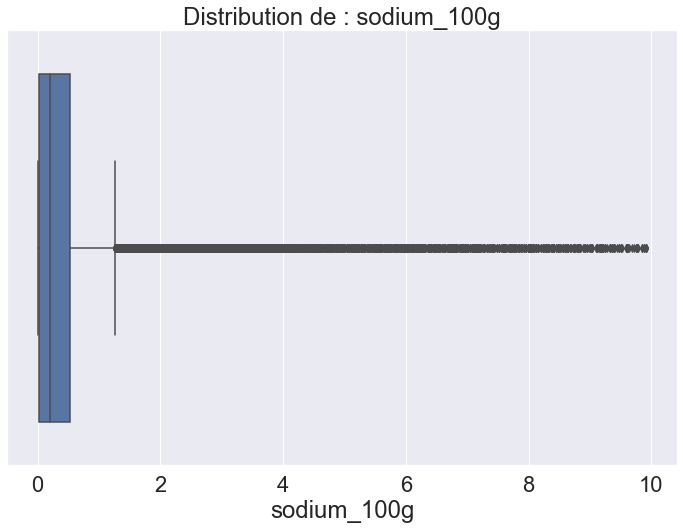

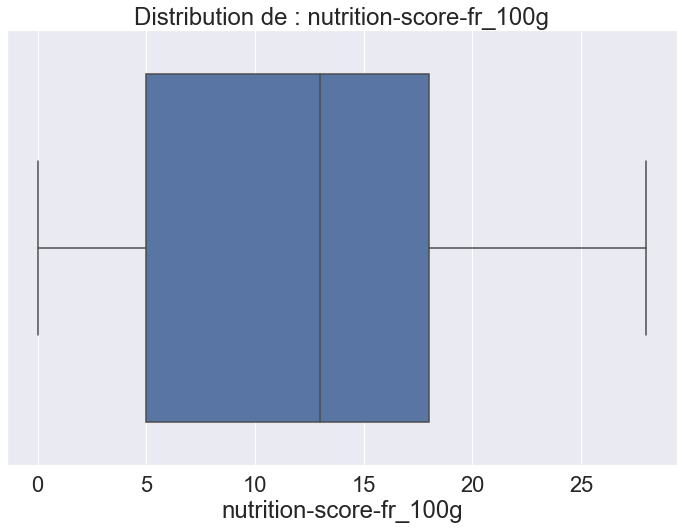

In [14]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (12,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

En observant les boxplot, on constate que les différentes variables ne semblent pas suivre une loi normale.

### Barplots

In [15]:
categories_columns = data.select_dtypes(include = ['category']).columns

In [16]:
categories_columns

Index(['packaging_tags', 'origins_tags', 'manufacturing_places_tags',
       'labels_tags', 'traces_tags', 'additives_tags',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'nova_group'],
      dtype='object')

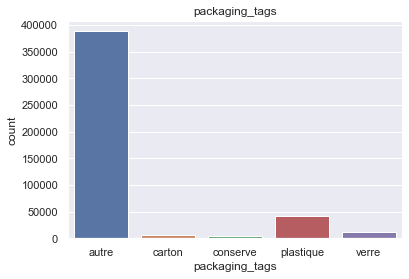

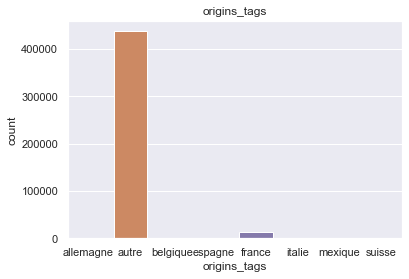

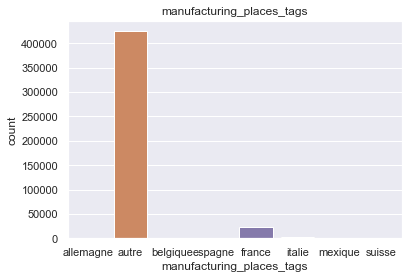

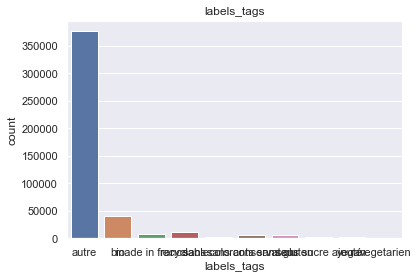

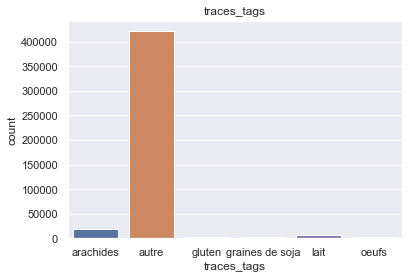

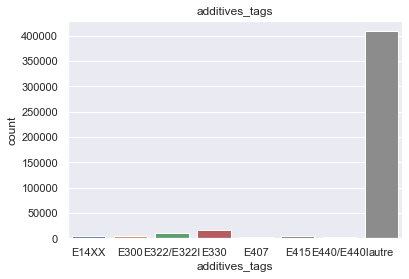

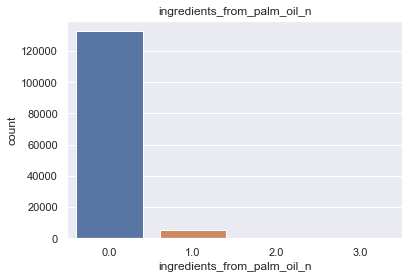

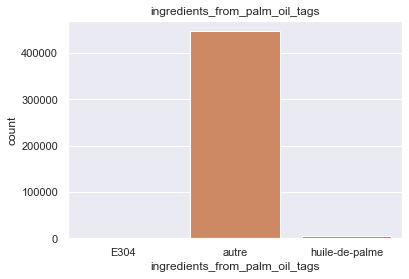

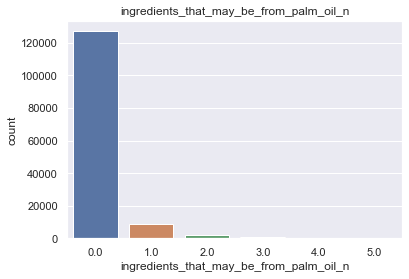

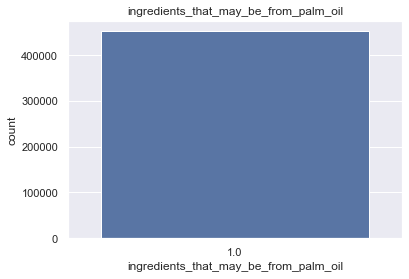

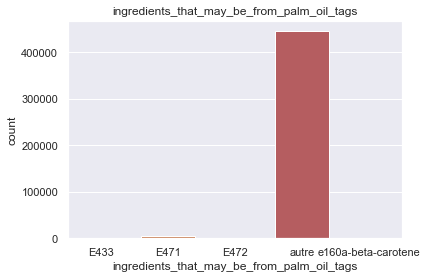

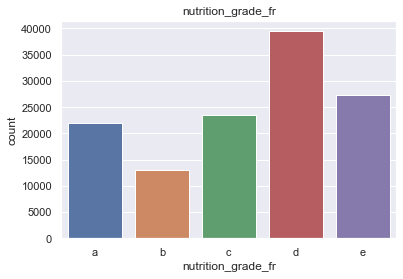

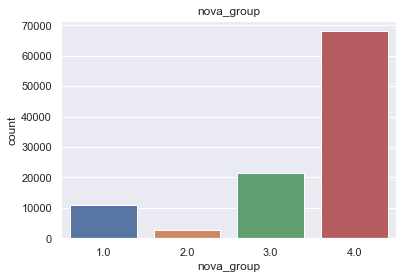

In [17]:
for column in categories_columns:
    sns.countplot(x = data[column], data = data)
    plt.title(column)
    plt.show()
    print('')

In [18]:
#for column in data.select_dtypes(include = ['object']).columns:
#    sns.countplot(x = data[column], data = data)
#    plt.show()
#    print('')

### Occurences des mots

In [19]:
object_columns = data.select_dtypes(include = ['object']).columns

In [20]:
object_columns = ['code',
                 'url',
                 'creator',
                 'product_name',
                  'packaging',
                  'brands',
                  'categories',
                  'stores',
                  'ingredients_text',
                  'nutrition_grade_fr',
                  'pnns_groups_1',
                  'pnns_groups_2',
                  'main_category_en', 
                  'image_url',
                  'image_small_url',
                  'image_ingredients_url',
                  'image_ingredients_small_url',
                  'image_nutrition_url',
                  'image_nutrition_small_url']

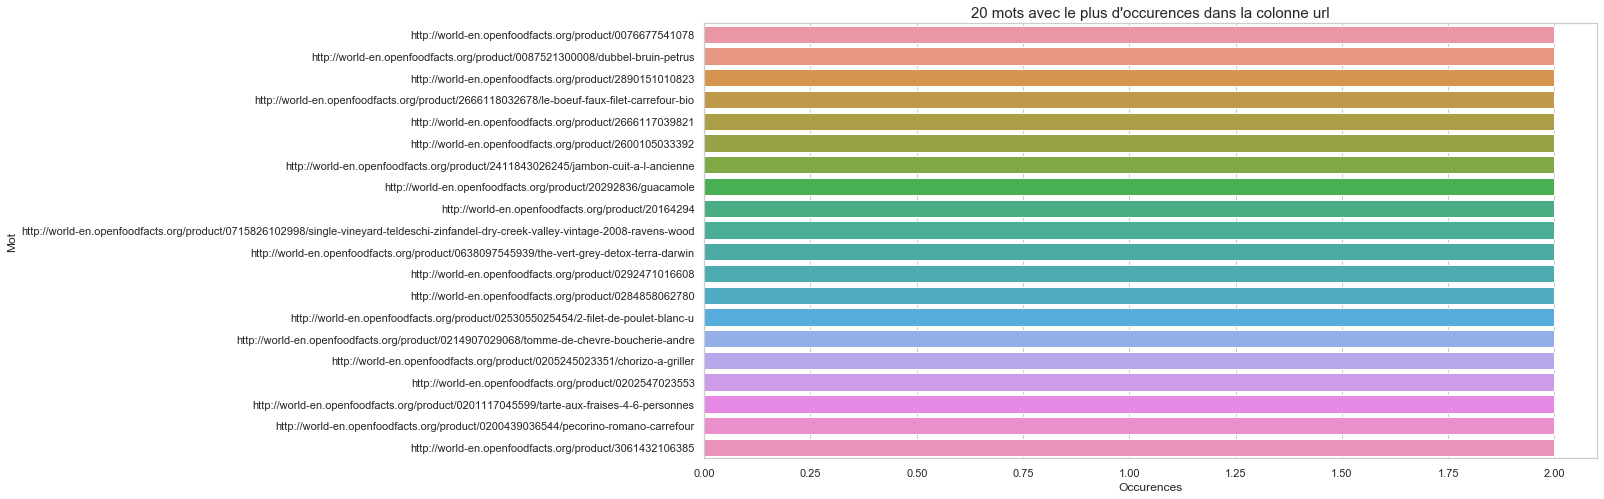

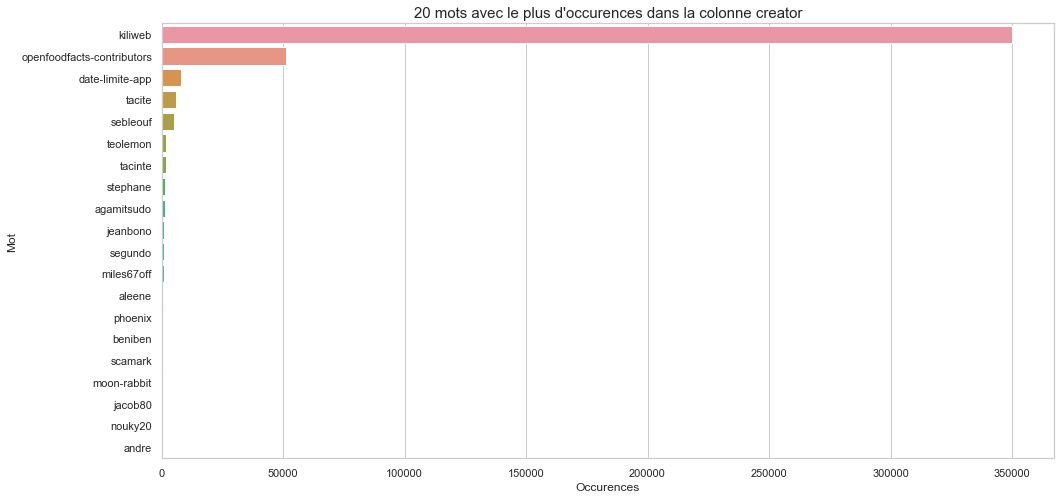

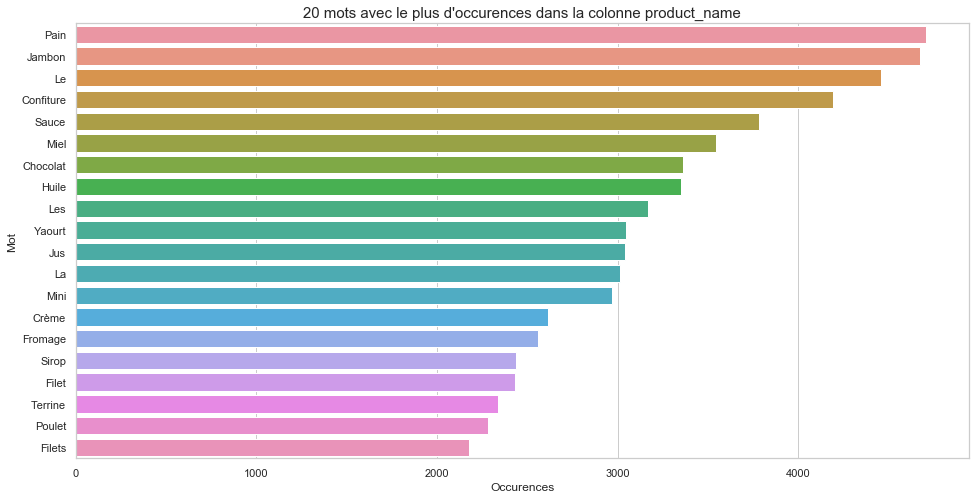

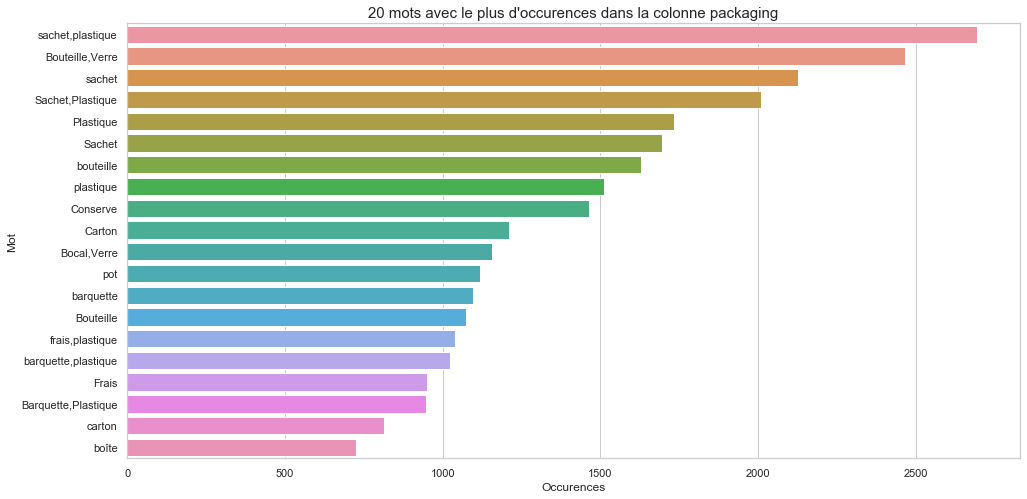

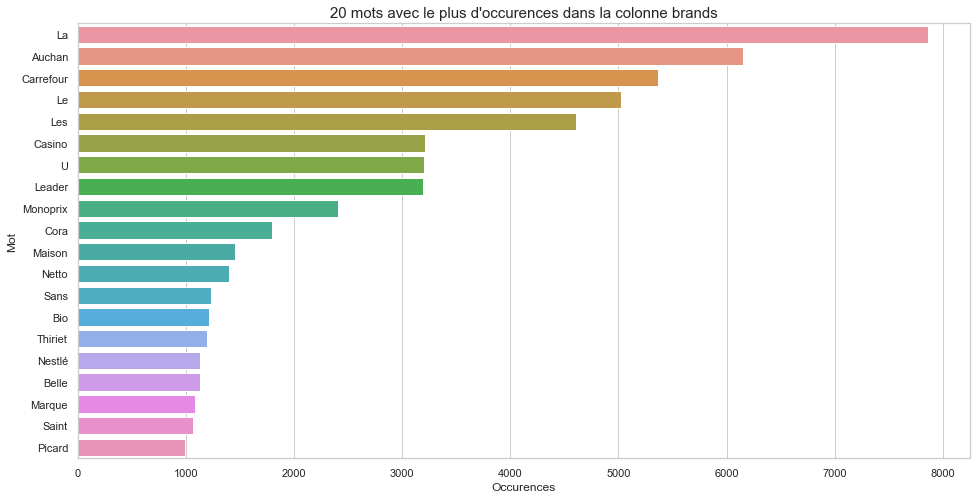

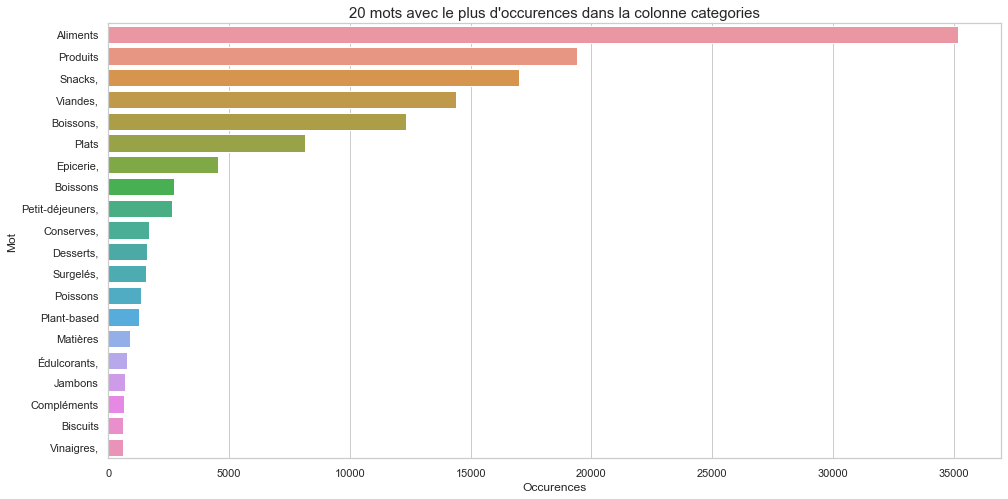

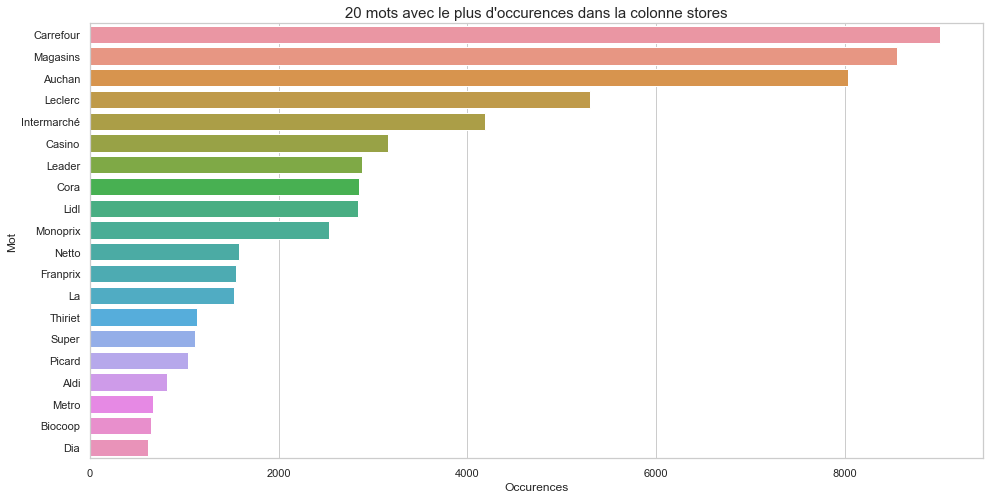

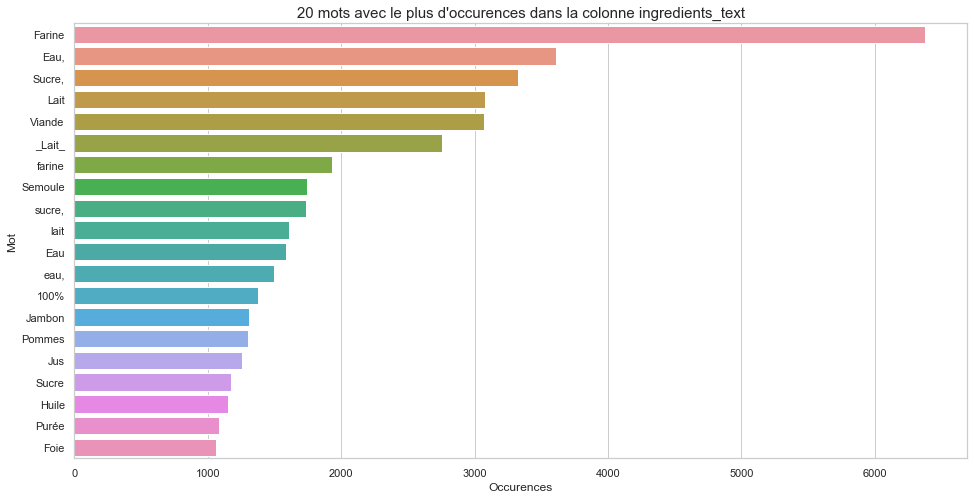

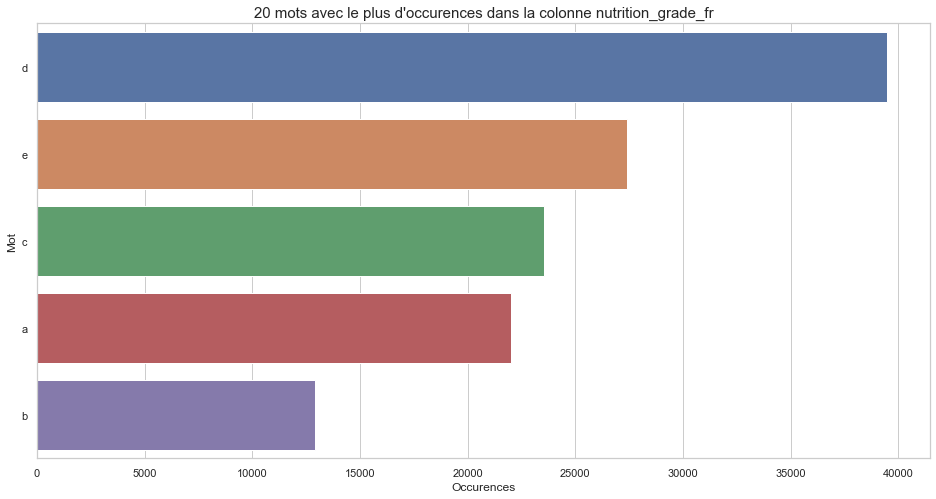

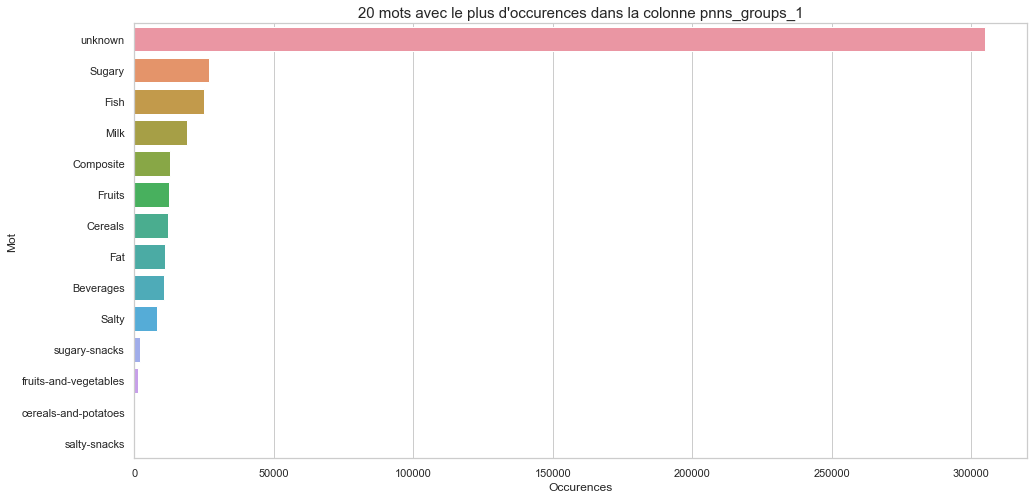

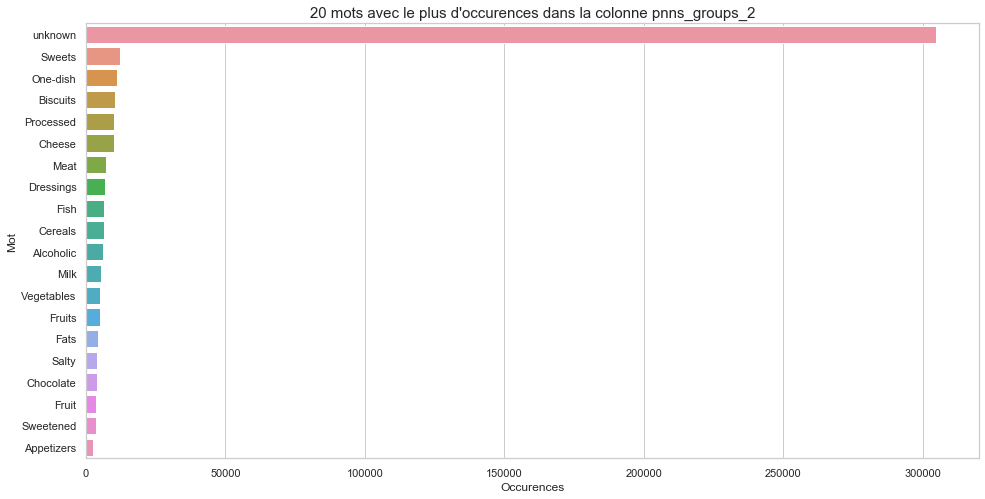

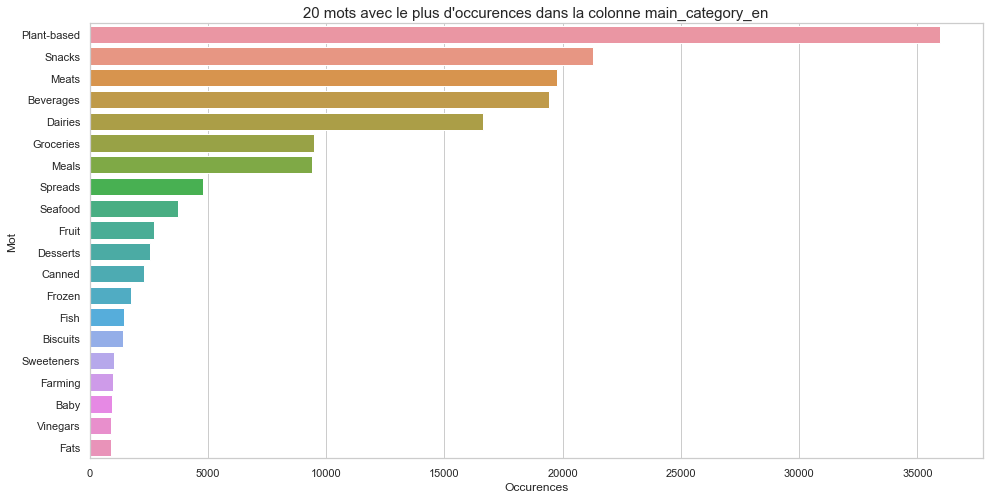

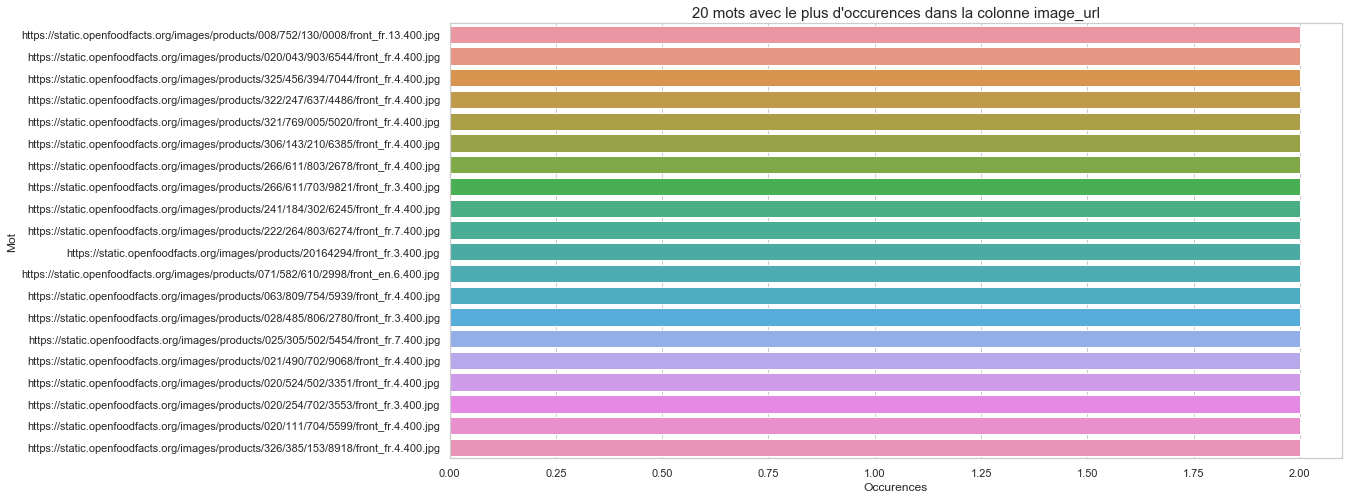

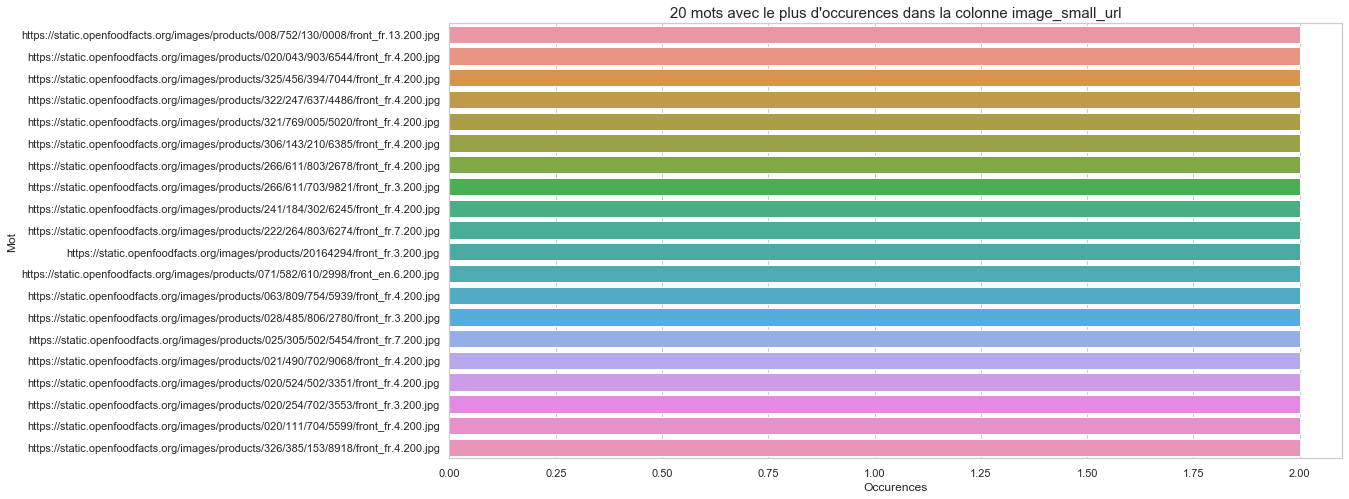

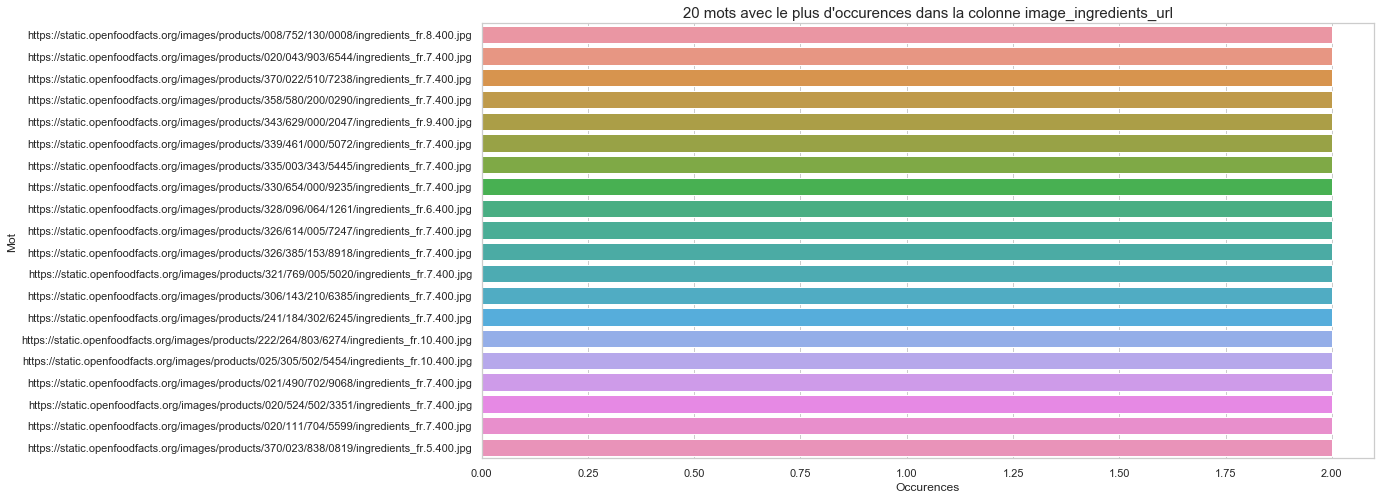

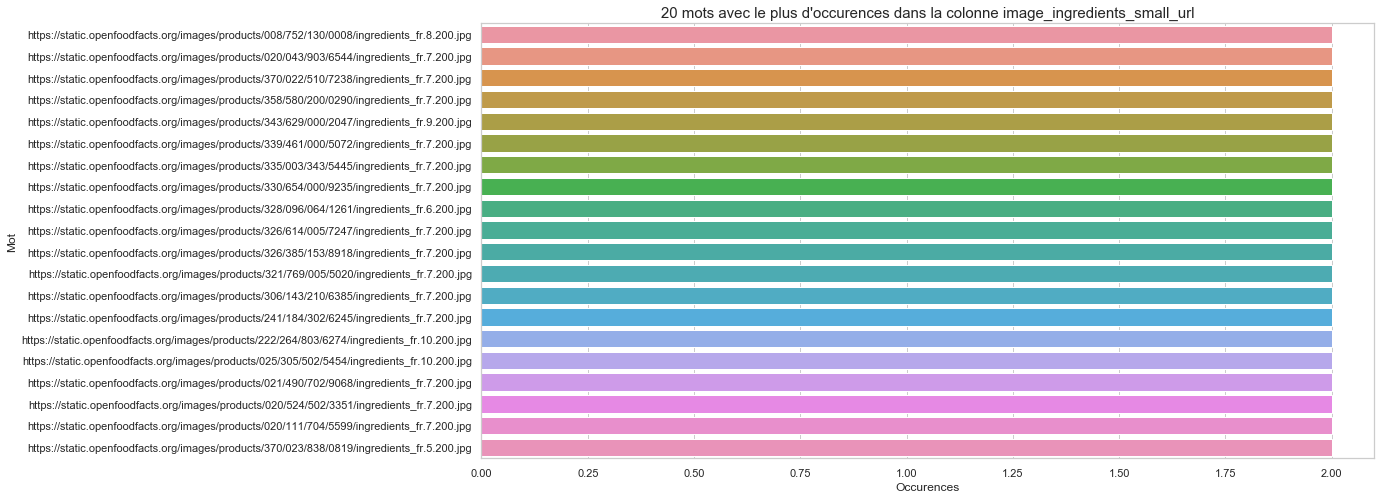

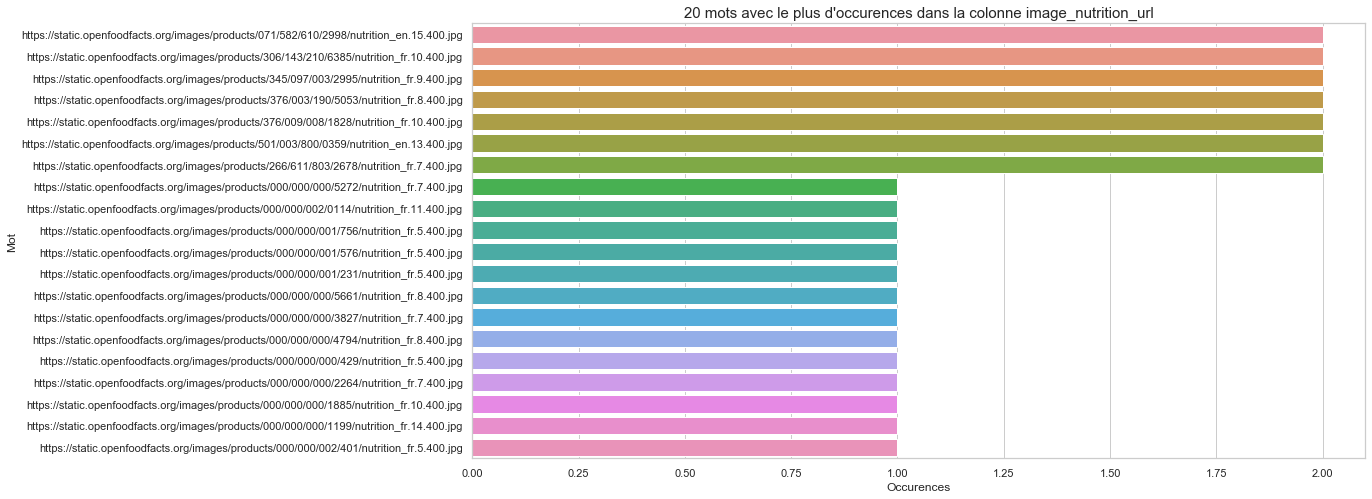

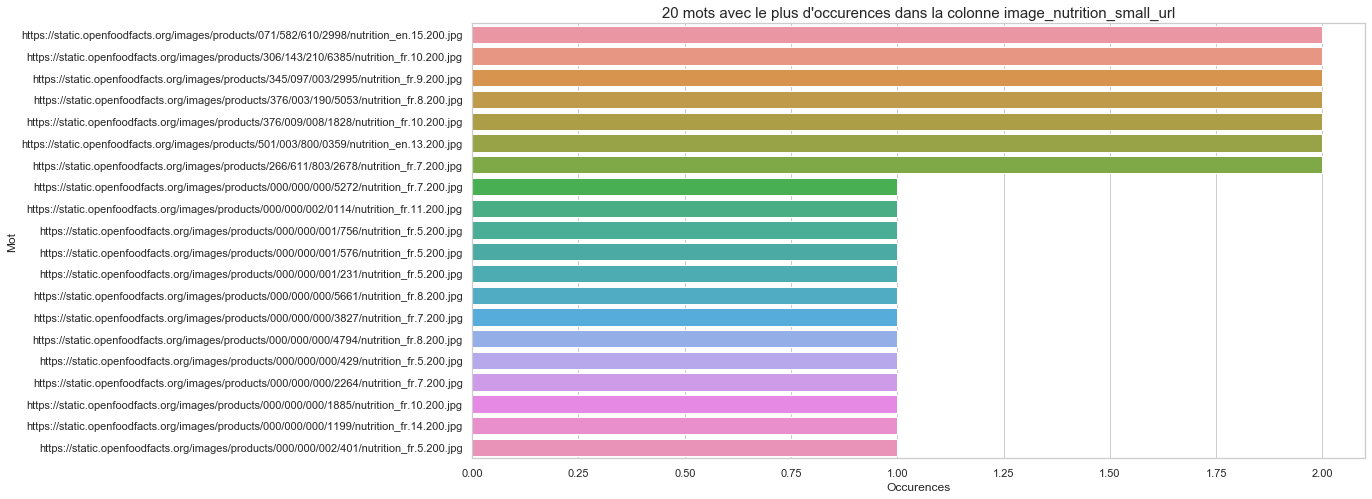

In [21]:
import collections
mots_populaires = []
for colonne in object_columns :
    liste_mots = [str(i).split(' ', 1)[0] for i in data[colonne].dropna().tolist()]
    mots_populaires.append(collections.Counter(liste_mots).most_common(20))

sns.set(font_scale=2.5)
for nom_colonne, liste_mots in zip(object_columns[1:], mots_populaires[1:]):
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))

    df_mots_utilises = pd.DataFrame(liste_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
    df_mots_utilises.head()
    sns.barplot(y = 'Mot', x='Occurences', data = df_mots_utilises)
    plt.title('20 mots avec le plus d\'occurences dans la colonne ' + nom_colonne, size=15)
    plt.show()

sns.set(font_scale=1)


### Informations sur les données

In [22]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,stores,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,fr:Xsf,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
3,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06
4,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,Mini coco,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg,NaN,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,2018-11-17 12:05:32,2018-11-17 12:05:33


**Nutriscore**

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


C:\Users\Vincent\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


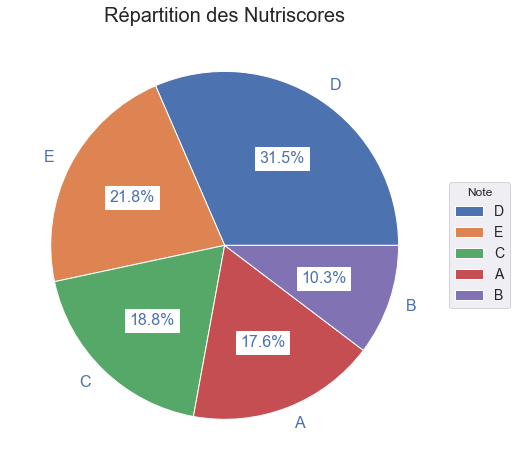

In [23]:
plt.figure(figsize=(8,8))

plt.title('Répartition des Nutriscores', size=20)
wedges, texts, autotexts = plt.pie(data.nutrition_grade_fr.value_counts().values, 
        labels = data.nutrition_grade_fr.value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16, 
                                     'color' : 'B', 
                                     'backgroundcolor' : 'W',}
       )

ax = plt.gca()

ax.legend(wedges, data.nutrition_grade_fr.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

In [24]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,stores,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,fr:Xsf,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
3,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06
4,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,Mini coco,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg,NaN,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,2018-11-17 12:05:32,2018-11-17 12:05:33


In [25]:
#provenance des url

In [26]:
data.url.dropna().apply(lambda x: str(x).split('/')[2]).unique()

array(['world-en.openfoodfacts.org'], dtype=object)

In [27]:
data.image_url.dropna().apply(lambda x: str(x).split('/')[2]).unique()

array(['static.openfoodfacts.org'], dtype=object)

In [28]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,stores,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,fr:Xsf,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
3,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06
4,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,Mini coco,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg,NaN,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,2018-11-17 12:05:32,2018-11-17 12:05:33


**Additifs**

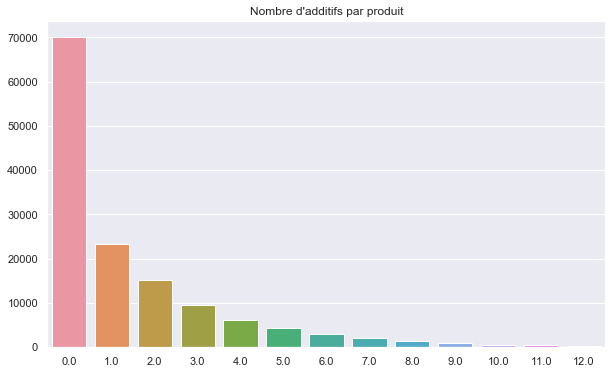

In [29]:
plt.figure(figsize=(10,6))
plt.title('Nombre d\'additifs par produit')
sns.barplot(x = data.additives_n.value_counts().index,
           y = data.additives_n.value_counts().values )
plt.show()

In [30]:
#origine

In [31]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['code', 'url', 'creator', 'product_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'categories', 'origins_tags',
       'manufacturing_places_tags', 'labels_tags', 'stores',
       'ingredients_text', 'traces_tags', 'additives_n', 'additives_tags',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en',
       'image_url', 'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'created', 'l

In [32]:
#description des grandeurs

In [33]:
data[['energy_100g',
      'fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
       'fiber_100g',
      'proteins_100g',
      'salt_100g',
      'sodium_100g',
      'nutrition-score-fr_100g']
    ].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,363757.000000,361917.000000,361067.000000,359667.000000,361194.000000,58064.000000,362179.000000,348963.000000,348960.000000,102953.000000
mean,1137.847646,13.764470,5.043295,26.549652,13.363818,3.111145,8.548823,1.033279,0.412925,12.212388
std,775.921264,17.219208,6.766167,27.540338,19.549000,4.389904,8.708648,1.835306,0.733443,7.590762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,469.000000,1.000000,0.200000,2.300000,0.600000,0.000000,1.400000,0.060000,0.024000,5.000000
50%,1100.000000,7.400000,1.900000,13.000000,3.300000,1.800000,6.100000,0.500000,0.200000,13.000000
75%,1653.000000,22.000000,7.700000,51.900000,18.900000,4.000000,12.900000,1.300000,0.520000,18.000000
max,3766.000000,100.000000,48.000000,97.300000,90.400000,33.700000,65.300000,24.900000,9.920000,28.000000


## Analyse Bivariée 

### Matrice de corrélation

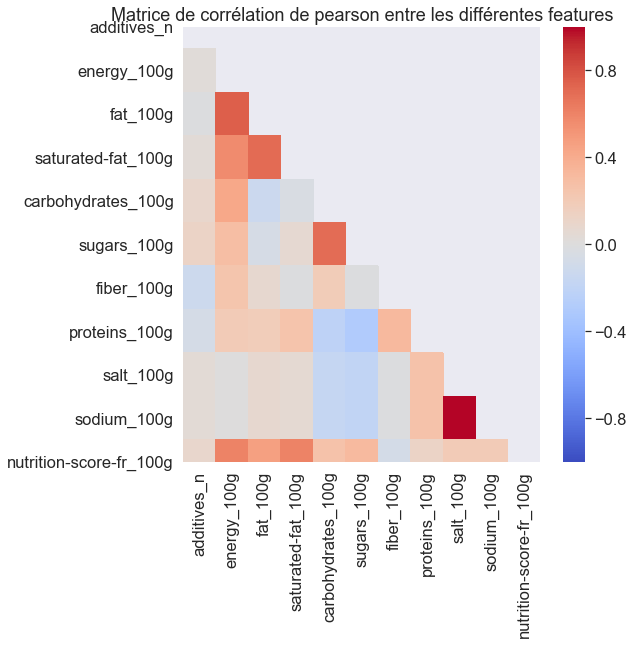

In [34]:


plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)


Analyse du tableau : 

* additives_n : pas de correlation remarquable
* energy_100g : forte corrélation avec:
    * fat_100g
    * saturated-fat_100g
    * carbohydrates_100g
    * nutrition-score-fr_100g
* fat_100g et saturated-fat_100g fortement corrélés
* nutrition-score-fr_100g : forte corrélation avec:
    * saturated_fat_100g
    * energy_100g
    * fat_100g

* sugars_100g : forte correlation avec carbohydrates_100g

* sodium_100g correlation très forte avec salt_100g 

In [35]:
object_columns = data.select_dtypes(include = ['object']).columns

In [36]:
object_columns

Index(['code', 'url', 'creator', 'product_name', 'quantity', 'packaging',
       'brands', 'categories', 'stores', 'ingredients_text', 'pnns_groups_1',
       'pnns_groups_2', 'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

### Test du Chi 2 - Indépendance des variables

In [37]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):
    
    alpha = 0.03    
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {0:.5f},\np : {0:.5f},\ndof : {0:.5f}\n'.format(stat_chi2, p, dof))
    #print('tableau de contingence : \n', tab_contingence)
    
    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [38]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,stores,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,fr:Xsf,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
3,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06
4,0000000000178,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,Mini coco,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg,NaN,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN,2018-11-17 12:05:32,2018-11-17 12:05:33


In [39]:
#data.nunique().sort_values()

In [40]:
pd.crosstab(data['ingredients_from_palm_oil_tags'], data['packaging_tags'])

packaging_tags,autre,carton,conserve,plastique,verre
ingredients_from_palm_oil_tags,,,,,
E304,105,8,1,59,0
autre,384923,6060,4042,39563,12373
huile-de-palme,3261,330,16,1832,33


In [41]:
tags = data.columns[data.columns.str.contains('_tag')].tolist()

In [42]:
tags

['packaging_tags',
 'origins_tags',
 'manufacturing_places_tags',
 'labels_tags',
 'traces_tags',
 'additives_tags',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags']

In [43]:
data[tags].sample(5)

,packaging_tags,origins_tags,manufacturing_places_tags,labels_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags
56007,autre,autre,autre,autre,autre,autre,autre,autre
61486,autre,autre,autre,bio,autre,autre,autre,autre
206339,autre,autre,autre,autre,autre,E322/E322I,autre,autre
43693,carton,autre,france,autre,autre,autre,autre,autre
203798,autre,autre,autre,bio,autre,autre,autre,autre


In [44]:
data.select_dtypes(include = ['int32','float64']).columns

Index(['additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [45]:
import seaborn as sns
x = pd.cut(data['nutrition-score-fr_100g'], 20)
for column in data.select_dtypes(include = ['int32','float64']).columns:
    print('test d\'indépendance {} / {}'.format('nutriscore',column))
    if data[column].nunique() > 20 :
        y = pd.cut(data[column], 20).astype('category')
    else:
        y = data[column].astype('category')
    test_chi2(x, y)
    
    #table = pd.DataFrame({'nutriscore' : x, column : y})
    #print(table.sample(10))
    print('________________________________________________________________________________________________\n')

test d'indépendance nutriscore / additives_n
chi2 : 3279.00251,
p : 3279.00251,
dof : 3279.00251

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / energy_100g
chi2 : 108904.48418,
p : 108904.48418,
dof : 108904.48418

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / fat_100g
chi2 : 88799.44260,
p : 88799.44260,
dof : 88799.44260

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / saturated-fat_100g
chi2 : 76497.61344,
p : 76497.61344,
dof : 76497.61344

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
______________________

Le test du CHI2 conclut au rejet de l'hypothèse d'indépendance pour toutes nos variables: on peut donc conclure qu'il y a un lien entre la valeur du nutriscore et la valeur des variables

### Test ANOVA (Analyse de la variance) -  Indépendance des variables

**Test de Normalité**

Les variables quantitatives sont-elles de distribution normale?  (hypothèse à valider pour pouvoir appliquer le test d'indépendance par l'analyse de la variance ADOMA)

**A : test de normalité d'Agostino & Pearson**

In [46]:
?stats.normaltest

Object `stats.normaltest` not found.


In [47]:
data[numeric_columns].head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN
4,NaN,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460,NaN


In [48]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(data[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
fiber_100g
p = 0
H0 est rejetée : fiber_100g n'est pas de distribution normale
________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale
________
nutrition-score-fr_100g
p = 0
H0 est rejetée : nutrition-score-fr_100g n'est pas de distribution normale


On ne peut pas appliquer le test Anova car les variables ne sont pas de distribution normale

**B. Test de normalité Kolmogorov Smirnov**

In [49]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data[column].dropna(), 
                     'norm', 
                     args=(data[column].mean(), data[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected : {} is not from a normal distribution".format(column))
    else:
        print("The null hypothesis cannot be rejected")

________
energy_100g
p = 0.0
The null hypothesis can be rejected : energy_100g is not from a normal distribution
________
fat_100g
p = 0.0
The null hypothesis can be rejected : fat_100g is not from a normal distribution
________
saturated-fat_100g
p = 0.0
The null hypothesis can be rejected : saturated-fat_100g is not from a normal distribution
________
carbohydrates_100g
p = 0.0
The null hypothesis can be rejected : carbohydrates_100g is not from a normal distribution
________
sugars_100g
p = 0.0
The null hypothesis can be rejected : sugars_100g is not from a normal distribution
________
fiber_100g
p = 0.0
The null hypothesis can be rejected : fiber_100g is not from a normal distribution
________
proteins_100g
p = 0.0
The null hypothesis can be rejected : proteins_100g is not from a normal distribution
________
salt_100g
p = 0.0
The null hypothesis can be rejected : salt_100g is not from a normal distribution
________
sodium_100g
p = 0.0
The null hypothesis can be rejected : sodium_10

Le test de Kolmogorov Smirnov confirme la non normalité des distributions de données : on ne peut appliquer l'analyse de la variance

**C. ANOVA : analyse de la variance**

Même si les données ne suivent pas une distribution normale, préparons les opérations pour appliquer le test si c'était le cas, à but d'apprentissage

Il faut fournir en entrée au test les données pour chaque groupe, regardons un exemple d'application pour le nutrition grade et la feature salt_100g 

In [50]:
data['nutrition_grade_fr'].dropna().unique().tolist()

['b', 'd', 'a', 'c', 'e']

In [51]:
from scipy import stats

data_a = data[data['nutrition_grade_fr'] == 'a'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_b = data[data['nutrition_grade_fr'] == 'b'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_c = data[data['nutrition_grade_fr'] == 'c'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_d = data[data['nutrition_grade_fr'] == 'd'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_e = data[data['nutrition_grade_fr'] == 'e'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)

f_statistic, p = stats.f_oneway(
                                    data_b,
                                    data_c,
                                    data_d,
                                    data_e)

In [52]:
pd.DataFrame({'features': data_b.columns.tolist(),
              'p' : p,
              'bool_test' : p<alpha}) #si p<alpha : on rejette l'hypothèse d'indépendance H0 : les variables ne sont pas indépendantes

,features,p,bool_test
0,additives_n,6.570015e-02,False
1,energy_100g,9.326869e-05,True
2,fat_100g,1.899738e-01,False
3,saturated-fat_100g,4.856102e-14,True
4,carbohydrates_100g,4.343655e-01,False
5,sugars_100g,8.755289e-03,True
6,fiber_100g,3.160729e-05,True
7,proteins_100g,6.004975e-01,False
8,salt_100g,5.866762e-02,False
9,sodium_100g,5.373367e-02,False


En l'absence de validation de l'hypothèse de normalité, ce test n'est pas applicable mais si c'était le cas, on pourrait interpréter les résultats comme suit : Les variables suivantes ont une distribution qui change en fonction des valeurs de nutrition_grade_fr (groupes de nutrition) :
* energy_100g
* saturated-fat_100g
* fiber_100g
* salt_100g
* sodium_100g
* nutrition-score-fr_100g (la valeur de la p-value est remarquable pour cette feature)

### Test de student d'indépendance

Hypothèses : 
* distributions normales => comme vu précédemment cette hypothèse n'est pas acceptable
* variance homogène => on va ramener la variance à 1 pour pouvoir appliquer le test de student

H0 : la moyenne de 2 échantillons de "salt_100g" est la même quel que soit le "nutrition grade" 


**de même que précédemment, le test n'est pas applicable faute d'hypothèse de normalité.**

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
data['salt_100g'].dropna()

0         1.40
3         2.04
4         1.15
7         0.42
8         0.25
          ... 
452599    0.19
452600    0.00
452603    0.02
452604    1.10
452605    0.18
Name: salt_100g, Length: 348963, dtype: float64

In [55]:
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
a = data[['nutrition-score-fr_100g','salt_100g']].copy().dropna()
b = scaler.fit_transform(a['salt_100g'].values.reshape(-1,1))
a = a['nutrition-score-fr_100g']
a = scaler.fit_transform(a.values.reshape(-1,1))
alpha = 0.05

In [56]:
t_stats, p = stats.ttest_ind(a, b)

In [57]:
p < alpha

array([ True])

Si les distributions étaient normales, on pourrait rejetter l'hypothèse d'indépendance : la moyenne des échantillons de salt_100g est liée à la valeur de nutrition_grade

# QUESTION 4

**Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.**

Idées : 
* Identifier les caractéristiques nutritionnelles des produits mauvais nutriscores et étiqueter automatiquement les produits qui ont des caractéristiques similaires
* **Calcul automatique de nutriscore**
* Vérifier si le nombre d'additifs est lié au nutriscore / mettre un indicateur sur le nombre d'additifs

## Calcul automatique de nutri score par régression linéaire

### Préparation jeu de données 

In [58]:
data_reg = data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).dropna()

In [59]:
data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).shape

(102953, 11)

In [60]:
data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).dropna(axis=0).shape

(460, 11)

In [61]:
data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).isna().sum().sort_values(ascending=False)

fiber_100g                 95732
additives_n                52286
saturated-fat_100g         1484 
carbohydrates_100g         913  
sugars_100g                891  
energy_100g                447  
proteins_100g              439  
salt_100g                  414  
sodium_100g                412  
fat_100g                   257  
nutrition-score-fr_100g    0    
dtype: int64

In [62]:
data_reg.shape

(460, 11)

Faisons notre analyse sur un jeu de données sans les colonnes fiber_100g et additives_n, de façon à maximiser la taille de notre échantllon (100 000 observations conservées au lieu de 460)

In [63]:
data_reg = data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64'])

In [64]:
data_reg = data_reg.drop(['fiber_100g','additives_n'], axis=1).dropna(axis=0)

In [65]:
data_reg.shape

(100011, 9)

In [66]:
data_reg.isna().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data_reg.copy()
y = X['nutrition-score-fr_100g']
X = X.drop(['nutrition-score-fr_100g'],axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Régression linéaire multiple

In [68]:
#?LinearRegression

In [69]:
lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)
print('ordonnée à l\'origine', lr.intercept_)


R² sur jeu d'entraînement :  0.6315045269600679
R² sur jeu de test 0.633808928373701
Poids de chaque variable dans la régression [ 1.80598178 -0.03803661  3.70313808  0.33116758  2.59761886 -0.07395115
 -1.04685878  3.41906255]
ordonnée à l'origine 12.113447229804676


On a un coefficient R² de 0,63 pour le jeu de test ce qui est un résultat plutôt mauvais. 

La régression ne colle pas au jeu de données 

In [70]:
resultat = pd.DataFrame({'nutriscore_reel' : y_test, 'prediction' : lr.predict(X_test)}).reset_index()

In [71]:
resultat.head()

,index,nutriscore_reel,prediction
0,309441,1.0,6.522385
1,118359,17.0,11.824732
2,267850,3.0,6.506254
3,50851,2.0,3.695683
4,23704,13.0,18.169315


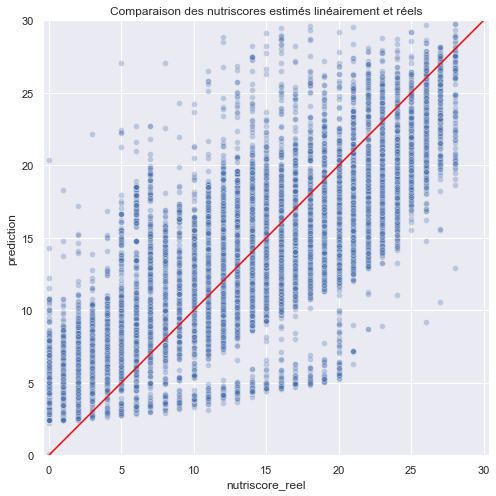

In [72]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Comparaison des nutriscores estimés linéairement et réels')
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'], alpha=0.3)
sns.lineplot([0 , 30], [0, 30], color='red')
ax = plt.gca()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('root mean squared error : ', sqrt(mean_squared_error(y_true = resultat['nutriscore_reel'], y_pred = resultat['prediction'])))

root mean squared error :  4.570048596511897


In [74]:
compare = abs(resultat['nutriscore_reel'] - resultat['prediction'])

In [75]:
compare.sum()/len(compare)

3.7669984700138524

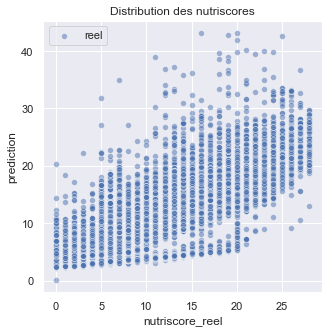

In [76]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.scatterplot( x = resultat['nutriscore_reel'], 
               y = resultat['prediction'], alpha=0.5)
plt.legend(['reel', 'prediction'])

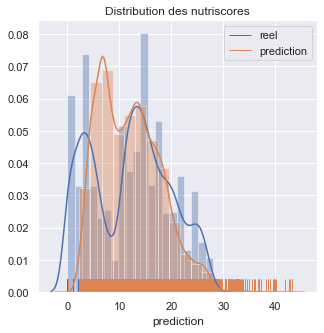

In [77]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.distplot(resultat['nutriscore_reel'], bins=20, rug=True)
sns.distplot(resultat['prediction'], bins = 20, rug=True)
plt.legend(['reel', 'prediction'])

In [78]:
pertinence_variables = pd.DataFrame()

In [79]:
pertinence_variables['coefs'] = lr.coef_.T

In [80]:
pertinence_variables

,coefs
0,1.805982
1,-0.038037
2,3.703138
3,0.331168
4,2.597619
5,-0.073951
6,-1.046859
7,3.419063


In [81]:
pertinence_variables['colonnes']= data_reg.drop(['nutrition-score-fr_100g'], axis=1).columns.tolist()

In [82]:
pertinence_variables['coefs'] = abs(pertinence_variables['coefs'])

In [83]:
pertinence_variables.sort_values(by='coefs', inplace=True, ascending=False)

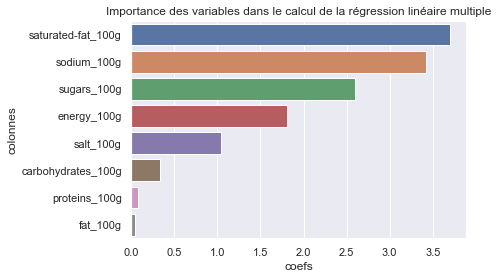

In [84]:
plt.title('Importance des variables dans le calcul de la régression linéaire multiple')
sns.barplot(x = pertinence_variables['coefs'], y =pertinence_variables['colonnes'])
plt.show()

### Ridge régression

Ajout d'un terme de pénalisation des coefficients (au carré) pour éviter l'overfitting

In [85]:
from sklearn.linear_model import Ridge

In [86]:
alphas = np.logspace(-8,0,9)
scores = []
ridge = {}
for alpha in alphas:
    ridge[alpha] = Ridge(alpha = alpha)
    ridge[alpha].fit(X_train, y_train)
    #print(ridge.score(X_train, y_train))
    #print(ridge.score(X_test, y_test))
    scores.append(ridge[alpha].score(X_test, y_test))

In [87]:
rmse = []
for alpha in alphas:
    rmse.append(sqrt(mean_squared_error(y_test, ridge[alpha].predict(X_test))))

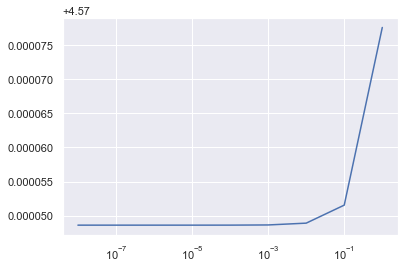

In [88]:
plt.figure()
ax = plt.gca()
ax.set(xscale="log")
plt.plot(alphas,rmse)
plt.show()

In [89]:
alphas[rmse.index(min(rmse))]

1e-08

In [90]:
print('Minimum de RMSE pour alpha = {} (RMSE = {})'.format(alphas[rmse.index(min(rmse))], min(rmse)))

Minimum de RMSE pour alpha = 1e-08 (RMSE = 4.570048596512174)


L'erreur est marginalement plus faible que la régression linéaire simple. On observe que pour alpha suffisemment faible, l'erreur n'évolue plus.

In [91]:
ridge_optimal = Ridge(alpha = 1e-8)
ridge_optimal.fit(X_train, y_train)

Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
print('R² sur jeu d\'entraînement : ', ridge_optimal.score(X_train,y_train))
print('R² sur jeu de test', ridge_optimal.score(X_test,y_test))
print('Poids de chaque variable dans la régression', ridge_optimal.coef_)
print('ordonnée à l\'origine', ridge_optimal.intercept_)

R² sur jeu d'entraînement :  0.6315045269600679
R² sur jeu de test 0.6338089283736565
Poids de chaque variable dans la régression [ 1.80598178 -0.03803661  3.70313808  0.33116758  2.59761886 -0.07395115
 -1.04685878  3.41906254]
ordonnée à l'origine 12.113447229804722


Le résultat est très semblable à celui obtenu dans le cadre de la régression linéaire multiple.

In [116]:
pertinence_variables_ridge = pd.DataFrame()
pertinence_variables_ridge['colonnes']= data_reg.drop(['nutrition-score-fr_100g'], axis=1).columns.tolist()
pertinence_variables_ridge['variance max'] = abs(ridge[alphas[rmse.index(min(rmse))]].coef_.T)
pertinence_variables_ridge.sort_values(by='variance max', ascending=False, inplace=True)

In [117]:
pertinence_variables_ridge

,colonnes,variance max
2,saturated-fat_100g,3.703138
7,sodium_100g,3.419063
4,sugars_100g,2.597619
0,energy_100g,1.805982
6,salt_100g,1.046859
3,carbohydrates_100g,0.331168
5,proteins_100g,0.073951
1,fat_100g,0.038037


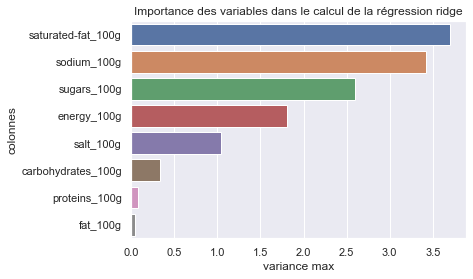

In [118]:
plt.title('Importance des variables dans le calcul de la régression ridge')
sns.barplot(y = pertinence_variables_ridge['colonnes'], x=pertinence_variables_ridge['variance max'])

On retrouve des résultats comparables qu'avec la régression multiple

### Lasso

Ajout d'un terme de magnitude à la régression (lambda * somme des abs(beta)).


Annule la contribution des termes qui contribuent peu à la régression

In [96]:
from sklearn.linear_model import Lasso

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791421.2263746008, tolerance: 429.5048905490082
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791289.5657877412, tolerance: 429.5048905490082
  positive)
C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789972.3564656735, tolerance: 429.5048905490082
  positive)


alpha optimal :  1e-08


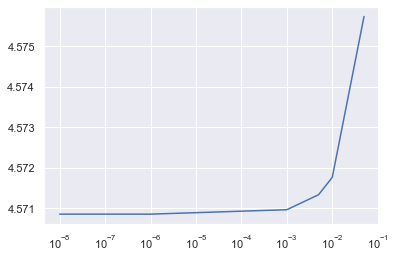

In [97]:
alphas_lasso = [1e-8, 1e-7, 0.000001, 0.001, 0.005, 0.01, 0.05]
rmse_lasso = []
for alpha in alphas_lasso:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    rmse_lasso.append(sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

print('alpha optimal : ', alphas_lasso[rmse_lasso.index(min(rmse_lasso))])

plt.figure()
plt.plot(alphas_lasso,rmse_lasso)
plt.xscale('log')
plt.show()

In [98]:
min(rmse_lasso)

4.570849559629682

In [99]:
min(rmse)

4.570048596512174

In [100]:
lasso_optimal = Lasso(alpha = 1e-8)
lasso_optimal.fit(X_train, y_train)

C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791421.2263746008, tolerance: 429.5048905490082
  positive)


Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
print('R² sur jeu d\'entraînement : ', lasso_optimal.score(X_train,y_train))
print('R² sur jeu de test', lasso_optimal.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lasso_optimal.coef_)
print('ordonnée à l\'origine', lasso_optimal.intercept_)

R² sur jeu d'entraînement :  0.6314659636875979
R² sur jeu de test 0.6336805572025279
Poids de chaque variable dans la régression [ 1.8077445  -0.0395266   3.7029839   0.32921173  2.59841173 -0.07411265
  0.99508909  1.37756029]
ordonnée à l'origine 12.113526599942942


Les résultats sont à nouveau sensiblement équivalents à la régression multiple et à la régression Ridge. 

### Elasticnet

compromis entre les 2 fonctions ridge et lasso.
écartée car lasso non pertinent.

Exemple pour tester :

In [102]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = .01, l1_ratio = 0.9)
en.fit(X_train, y_train)
print('RMSE :' , sqrt(mean_squared_error(y_test, en.predict(X_test))))

RMSE : 4.57175810675612


In [103]:
print('R² sur jeu de test', en.score(X_test,y_test))


R² sur jeu de test 0.6335349162008231


### Random Forest Regressor

Le modèle par régression linéaire ne semble pas donner de bons résultats. Essayons un modèle non linéaire (modèle d'ensemble : Random Forest)

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50],
    'verbose' : [1]
}

rfr = GridSearchCV(RandomForestRegressor(), params, cv = 5)

In [105]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [50], 'verbose'

In [106]:
rfr.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=1, warm_start=False)

In [107]:

print('R² sur jeu d\'entraînement : ', rfr.best_estimator_.score(X_train,y_train))
print('R² sur jeu de test', rfr.best_estimator_.score(X_test,y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R² sur jeu d'entraînement :  0.9883917789238906
R² sur jeu de test 0.9399427334589103


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [108]:
print('RMSE = ', sqrt(mean_squared_error(y_test, rfr.best_estimator_.predict(X_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE =  1.8507583757894865


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


(-1.62780839909238, 29.627808399092388, -2.272432424135829, 45.521618529329515)

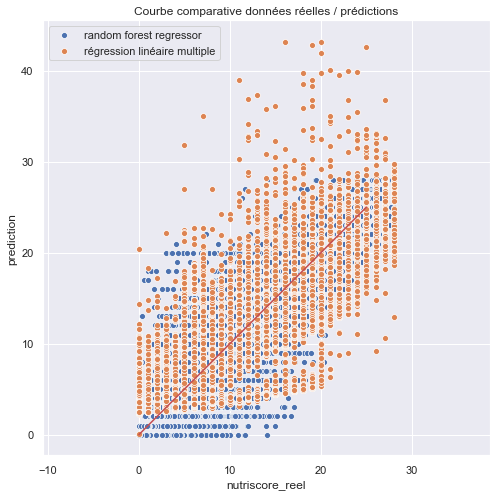

In [109]:
plt.figure(figsize=(8,8))
plt.title('Courbe comparative données réelles / prédictions')
sns.scatterplot(x = rfr.predict(X_test),y = y_test)
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'])
plt.legend(['random forest regressor', 'régression linéaire multiple'])
sns.lineplot([0,25],[0,25], color='r')
ax = plt.gca()
ax.set_xlim(0,25)
ax.set_ylim(0,25)
ax.axis('equal')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


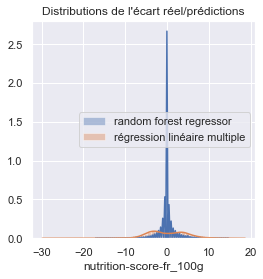

In [110]:
plt.figure(figsize=(4,4))
plt.title('Distributions de l\'écart réel/prédictions')
sns.distplot(rfr.predict(X_test) -  y_test)
sns.distplot(resultat['nutriscore_reel'] - resultat['prediction'])
plt.legend(['random forest regressor', 'régression linéaire multiple'])

In [111]:
rfr.best_estimator_.feature_importances_

array([0.12936997, 0.01421878, 0.48991034, 0.02840296, 0.15108858,
       0.03332764, 0.03679603, 0.11688569])

In [112]:
random_forest_features = pd.DataFrame({'feature' : data_reg.drop(['nutrition-score-fr_100g'],axis=1).columns,
                                      'importance' : rfr.best_estimator_.feature_importances_})

In [113]:
random_forest_features.sort_values(by='importance',ascending=False, inplace=True)

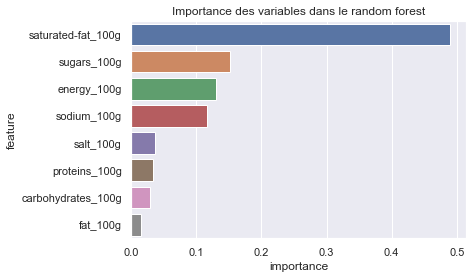

In [114]:
plt.title('Importance des variables dans le random forest')

sns.barplot(y = random_forest_features['feature'], x=random_forest_features['importance'])

Graphiquement, on observe assez nettement que le random forest décrit mieux la variance du jeu de données que le modèle par régression linéaire multiple :
* écart quasi nul pour une partie plus importante des données, 
* pour les écarts plus important, la porportion est plus faible que pour la régression linéaire.

# QUESTION 5

**Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.** : voir support de présentation